## Projectile Motion

A Python notebook for calculating projectile motion.

In [1]:
#first we import some modules - these are collections of pre-existing functions that we can use

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import astropy.units as u
import astropy.constants as const

%matplotlib notebook

In [2]:
#this will setup the animation of the projectile. Don't worry about understanding it!


def plot_projectile(xs,ys):
    if xs is None:
        xs = np.zeros_like(ys)
    if ys is None:
        ys = np.zeros_like(xs)
    
    fig, ax = plt.subplots(figsize=(5,5))

    ax.fill([-100,-100,100,100],[-100,0,0,-100],fc='gray',alpha=0.2,zorder=-1)
    ax.fill([-100,-100,0,0],[0,100,100,0],fc='gray',alpha=0.2,zorder=-1)
    
    
    x_lims = [xs.min()*0.8,xs.max()*1.2]
    y_lims = [ys.min()*0.8,ys.max()*1.2]
    
    min_extent = 2
    
    if abs(x_lims[0]) < min_extent:
        x_lims[0] = -min_extent
    if abs(x_lims[1]) < min_extent:
        x_lims[1] = min_extent
    if abs(y_lims[0]) < min_extent:
        y_lims[0] = -min_extent
    if abs(y_lims[1]) < min_extent:
        y_lims[1] = min_extent

    ax.set_xlim(x_lims)
    ax.set_ylim(y_lims)

    solid_point, = ax.plot(xs[0],ys[0],marker='o',markerfacecolor='lightblue',markeredgecolor='navy',markersize=10,zorder=1)
    tracer_points, = ax.plot(xs[0],ys[0],marker='None',markerfacecolor='None',markeredgecolor='navy',markersize=10,color='navy',alpha=0.5,zorder=0)

    
    tracer_points_x, = ax.plot(xs[0],-1,marker='o',markerfacecolor='None',markeredgecolor='navy',markersize=10,linestyle='None',alpha=1,zorder=0)
    tracer_points_y, = ax.plot(-1,ys[0],marker='o',markerfacecolor='None',markeredgecolor='navy',markersize=10,linestyle='None',alpha=1,zorder=0)

    
    def update(i):
        solid_point.set_data(xs[i],ys[i])
        tracer_points.set_data(xs[0:i+1],ys[0:i+1])
        tracer_points_x.set_data(xs[0:i+1],-1*np.ones_like(xs[0:i+1]))
        tracer_points_y.set_data(-1*np.ones_like(ys[0:i+1]),ys[0:i+1])
        return


    return fig, ax, update

Now we can simulate the projectile's motion!

In [3]:
#define the starting conditions for the problem:

g = 9.8 #m/s^2
height = 30 #m
initial_velocity = 12 #m/s
angle = 21#degrees

#the ball will be calculated at several time intervals. Here we define the timestep:

dt = 0.1 #timestep in seconds
max_steps = 1000 #maximum number of timesteps

#we will store the x- and y-positions of the ball in an array. Let's set them up now:

xs = np.array([0]) #starting position at x=0
ys = np.array([height]) #starting position at y=0

x_accel = 0 #there is no acceleration in the x-direction
y_accel = -g #the acceleration in the y-direction is g


x_vel = initial_velocity * np.cos(np.deg2rad(angle)) #m/s
y_vel = initial_velocity * np.sin(np.deg2rad(angle)) #m/s


for i in range(max_steps):
    x_pos = xs[i] #load in the previous position
    y_pos = ys[i]
    
    x_vel = x_vel + x_accel * dt #calculate the new x velocity
    y_vel = y_vel + y_accel * dt #calculate the new y velocity    
    
    x_pos = x_pos + (x_vel * dt) #calculate the new x position
    y_pos = y_pos + (y_vel * dt) #calculate the new y position
    
    if y_pos <= 0: #check to see if we've hit the ground
        xs = np.append(xs,x_pos)
        ys = np.append(ys,0) #set the final value to zero
        break #stop the loop
    else:
        xs = np.append(xs,x_pos)
        ys = np.append(ys,y_pos) #update the dictionary with the new position and start the loop again
    

max_time = dt * (len(ys)-1) #show the time before the ball hit the ground 

print('Time taken: t={:.2f}s'.format(max_time))
print('Distance traveled: x={:.1f}m'.format(xs.max()))


print(ys)

Time taken: t=2.90s
Distance traveled: x=32.5m
[30.         30.33204154 30.56608308 30.70212462 30.74016616 30.6802077
 30.52224924 30.26629078 29.91233232 29.46037386 28.91041539 28.26245693
 27.51649847 26.67254001 25.73058155 24.69062309 23.55266463 22.31670617
 20.98274771 19.55078925 18.02083079 16.39287233 14.66691387 12.84295541
 10.92099695  8.90103849  6.78308003  4.56712157  2.2531631   0.        ]


<IPython.core.display.Javascript object>


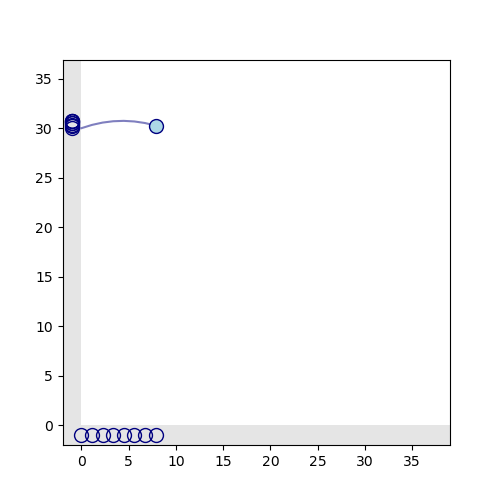

In [4]:
#now we can show an animation of the ball:

fig, ax, update = plot_projectile(xs,ys)

anim = animation.FuncAnimation(fig
                                ,func=update
                                ,frames=len(ys)
                                ,interval=100
                                ,blit=True
                                ,repeat=True
                                ,repeat_delay=500)

plt.show() #display the figure!

In [5]:
print(xs)

print(ys)

[ 0.          1.12029651  2.24059302  3.36088954  4.48118605  5.60148256
  6.72177907  7.84207558  8.96237209 10.08266861 11.20296512 12.32326163
 13.44355814 14.56385465 15.68415117 16.80444768 17.92474419 19.0450407
 20.16533721 21.28563372 22.40593024 23.52622675 24.64652326 25.76681977
 26.88711628 28.00741279 29.12770931 30.24800582 31.36830233 32.48859884]
[30.         30.33204154 30.56608308 30.70212462 30.74016616 30.6802077
 30.52224924 30.26629078 29.91233232 29.46037386 28.91041539 28.26245693
 27.51649847 26.67254001 25.73058155 24.69062309 23.55266463 22.31670617
 20.98274771 19.55078925 18.02083079 16.39287233 14.66691387 12.84295541
 10.92099695  8.90103849  6.78308003  4.56712157  2.2531631   0.        ]
